**Abstract : This project involves utilizing a cancer patient dataset to apply machine learning algorithms in predicting cancer. Machine learning offers powerful tools for identifying patterns within complex medical data, allowing for early and accurate cancer diagnoses. Key algorithms, such as Decision Trees, Support Vector Machines, K-Nearest Neighbors, and Neural Networks, are implemented to evaluate their effectiveness in distinguishing between cancerous and non-cancerous cases. By training these models on relevant features like tumor size, cell structure, and other biomarkers, the study aims to improve the accuracy and reliability of cancer prediction. The results from different models are compared to identify the most effective approach, helping medical professionals make more informed decisions and offering potential insights into automated cancer screening systems.**

# 1. Read file

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import gaussian_kde 

In [2]:
df = pd.read_csv('/kaggle/input/cancer-data/cancer patient data sets.csv')

In [3]:
print(df.head())

   index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0         P1   33       1              2            4             5   
1      1        P10   17       1              3            1             5   
2      2       P100   35       1              4            5             6   
3      3      P1000   37       1              7            7             7   
4      4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                     4             3                     2  ...        3   
1                     3             4                     2  ...        1   
2                     5             5                     4  ...        8   
3                     7             6                     7  ...        4   
4                     7             7                     6  ...        3   

   Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

# 2. Data processing

## 2.1. Check the Na value in each column

In [5]:
# Check for NA (null) values ​​in data
print("Number of NA values ​​in each column:")
# Will display the number of NA values ​​in each column
print(df.isna().sum())

Number of NA values ​​in each column:
index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64


## 2.2. Remove unnecessary features

In [6]:
df = df.drop(columns=['index', 'Patient Id'])

In [7]:
df

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


# 3. Data visualization

## 3.1. Chart all data

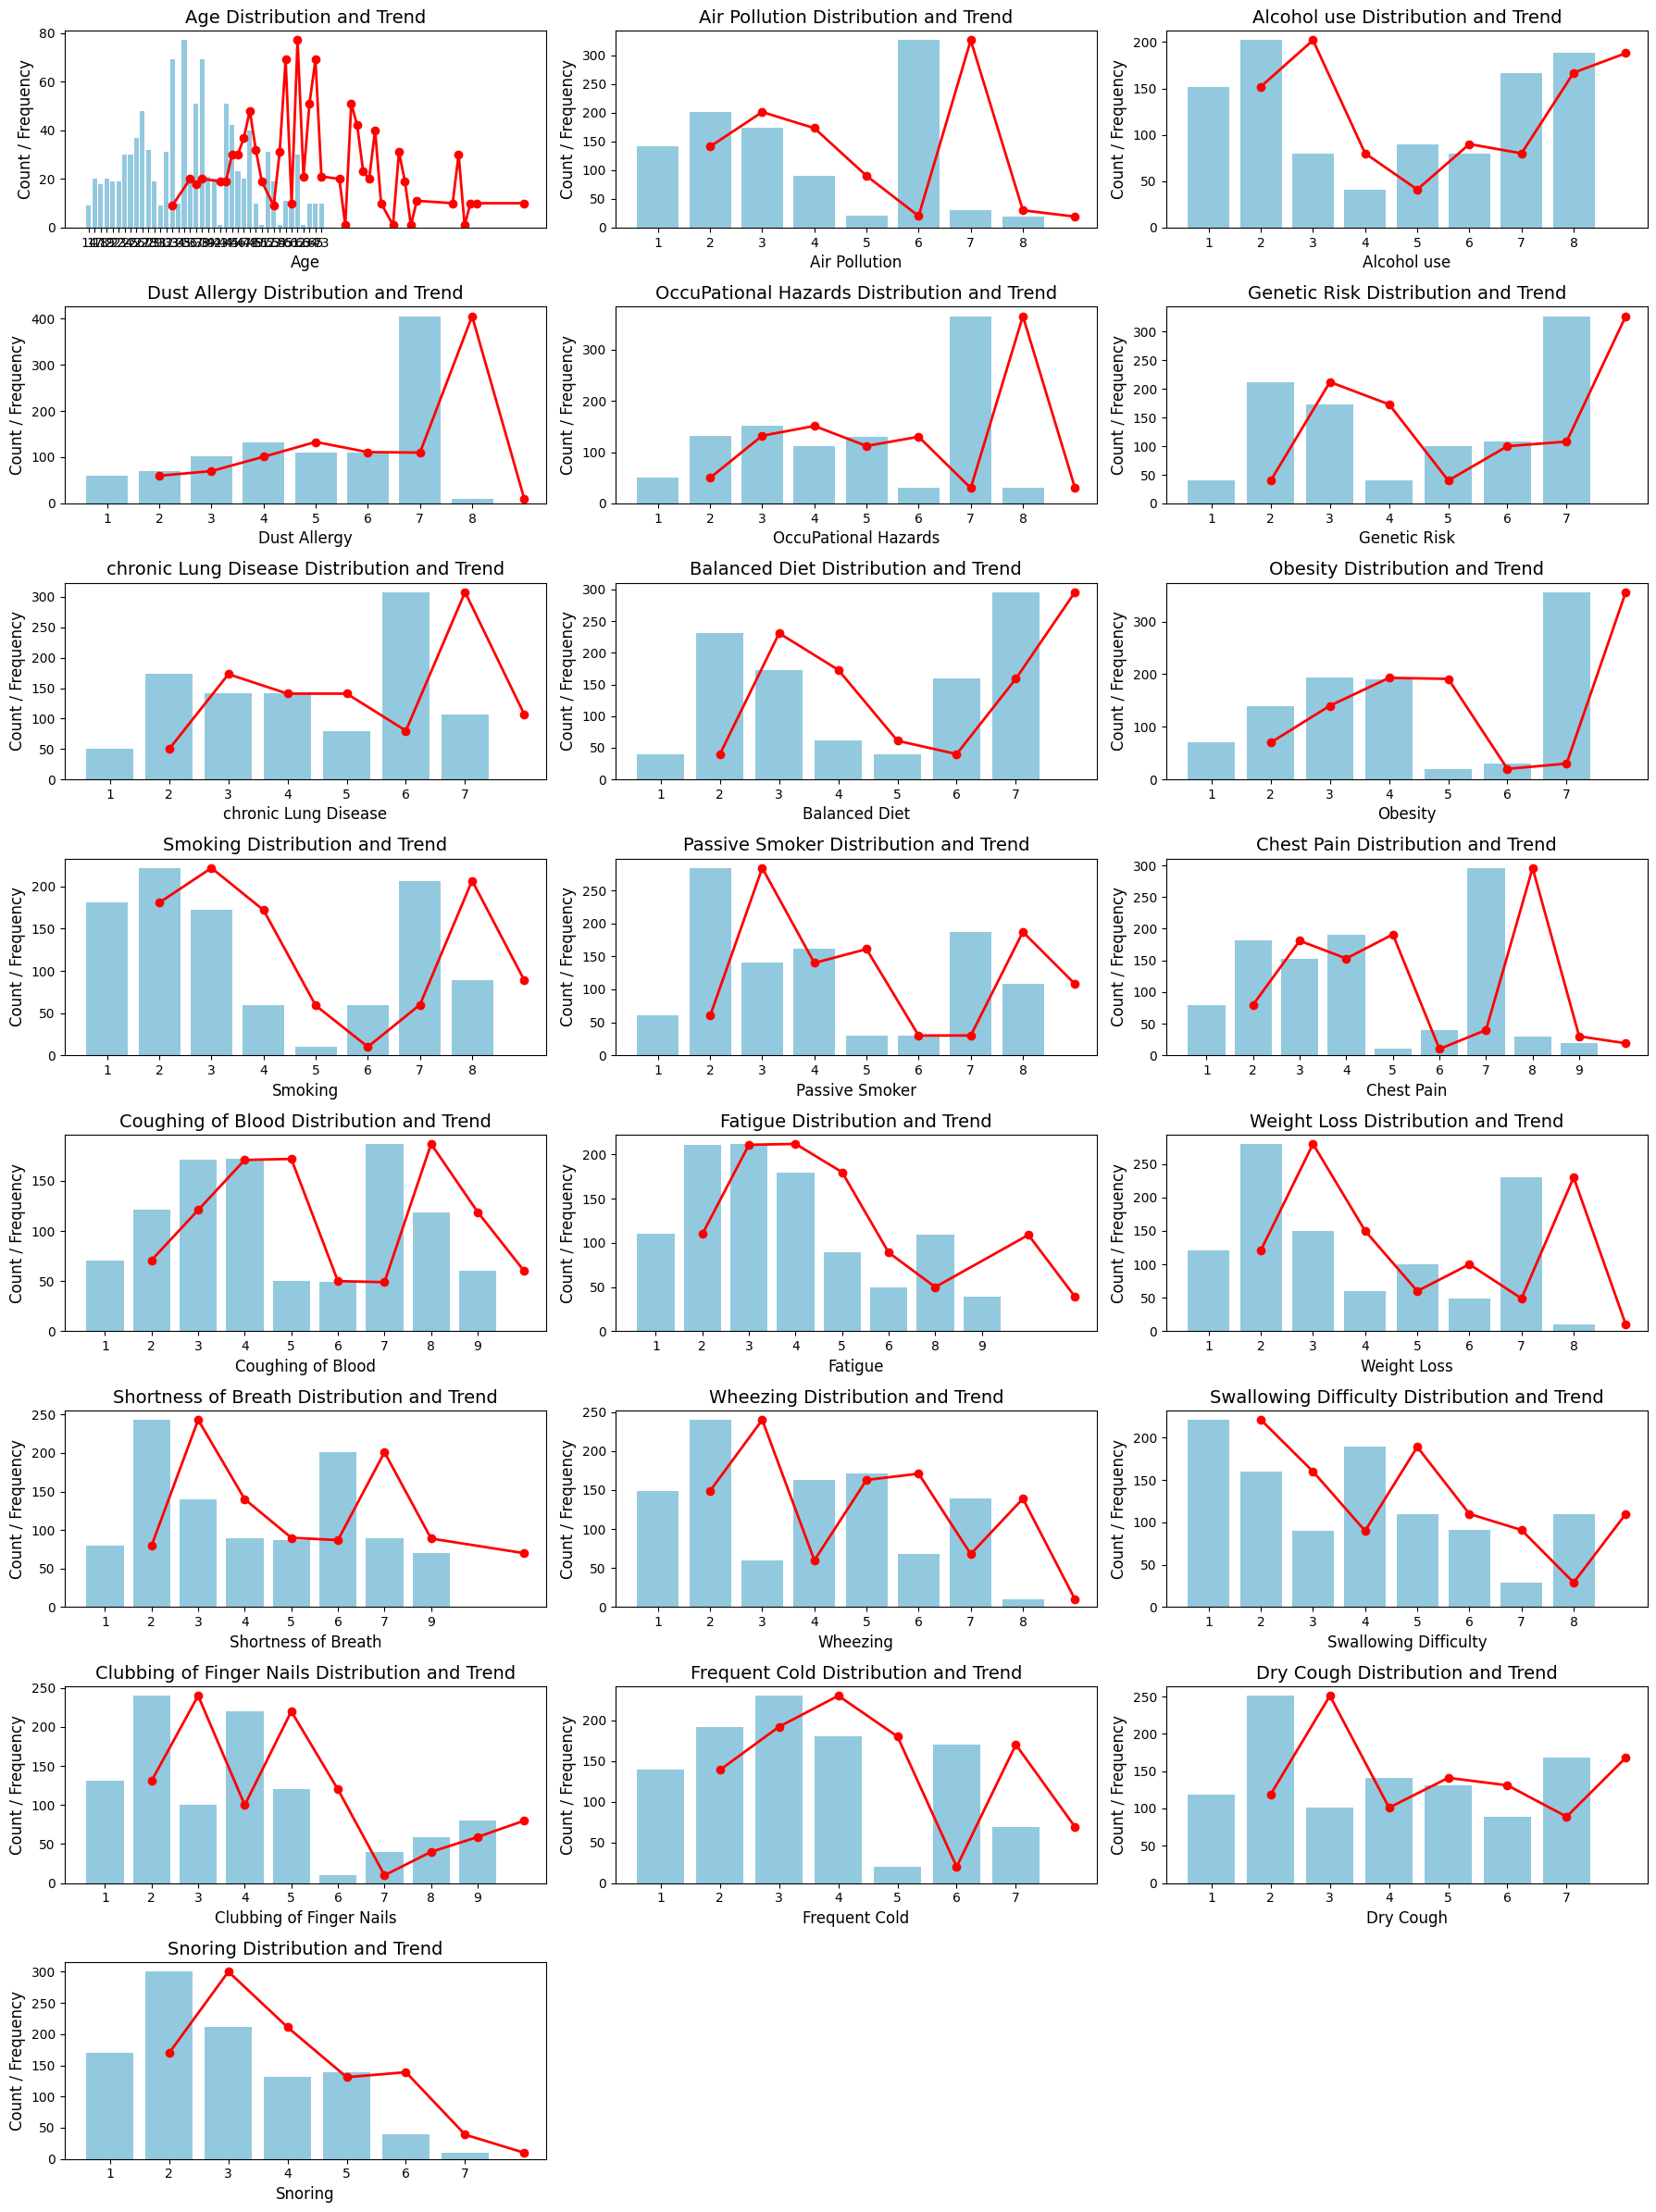

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = ['Age', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards',
                     'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 
                     'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 
                     'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 
                     'Frequent Cold', 'Dry Cough', 'Snoring']

plt.figure(figsize=(18, 24))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(8, 3, i)
    sns.countplot(x=df[column], color='skyblue')
    
    plt.plot(df[column].value_counts().sort_index().index, df[column].value_counts().sort_index().values, 
             color='red', marker='o', linestyle='-', linewidth=2)

    plt.title(f'{column} Distribution and Trend', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count / Frequency', fontsize=12)

plt.tight_layout()
plt.show()


## 3.2. Age Distribution Chart

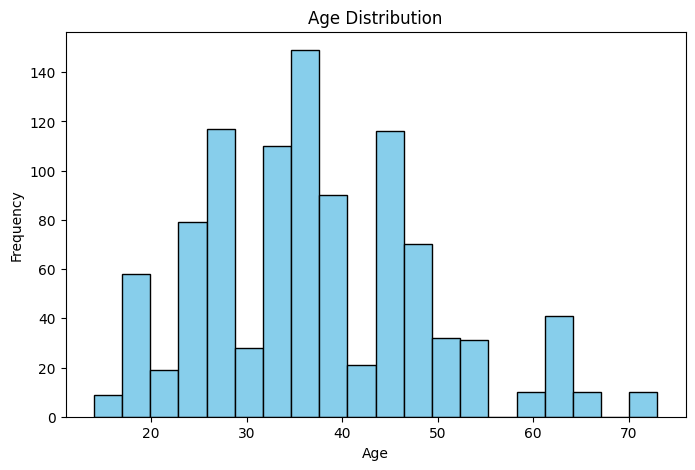

In [9]:
plt.figure(figsize=(8, 5))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## 3.3. Sex Distribution Chart

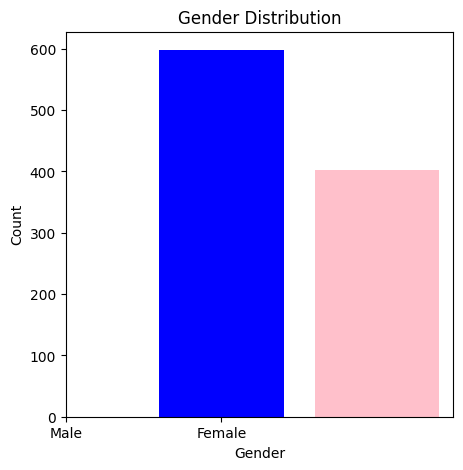

In [10]:
plt.figure(figsize=(5, 5))
gender_counts = df['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color=['blue', 'pink'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show()

## 3.4. Boxplot chart of the relationship between Air Pollution and Level

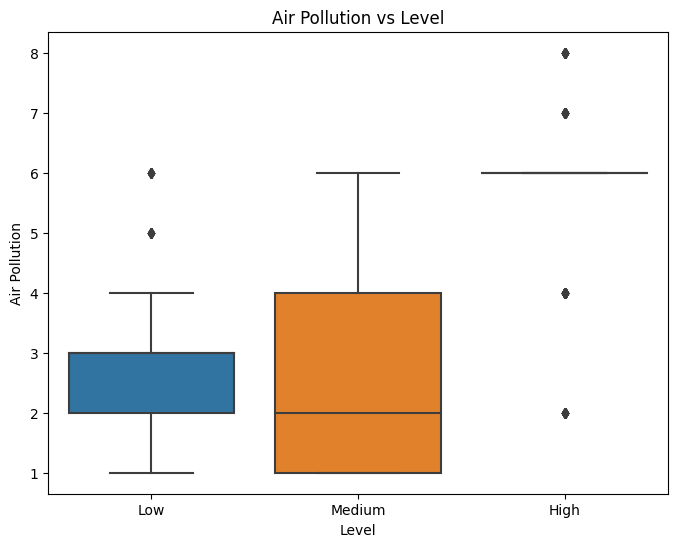

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Level', y='Air Pollution', data=df)
plt.title('Air Pollution vs Level')
plt.xlabel('Level')
plt.ylabel('Air Pollution')
plt.show()

# 4. Train-Test Split

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [13]:
features = df.drop(columns=['Level'])

In [14]:
label_encoder = LabelEncoder()

target = label_encoder.fit_transform(df['Level'])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 5. Model training

## 5.1. LogisticRegression Model

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [17]:
model_accuracies = []

In [18]:
lr_model = LogisticRegression(max_iter=2000)

lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print(f"Accuracy (Logistic Regression): {accuracy_score(y_test, y_pred_lr)}")
print(classification_report(y_test, y_pred_lr))

model_accuracies.append(('LogisticRegression', accuracy_score(y_test, y_pred_lr)))


Accuracy (Logistic Regression): 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        63

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



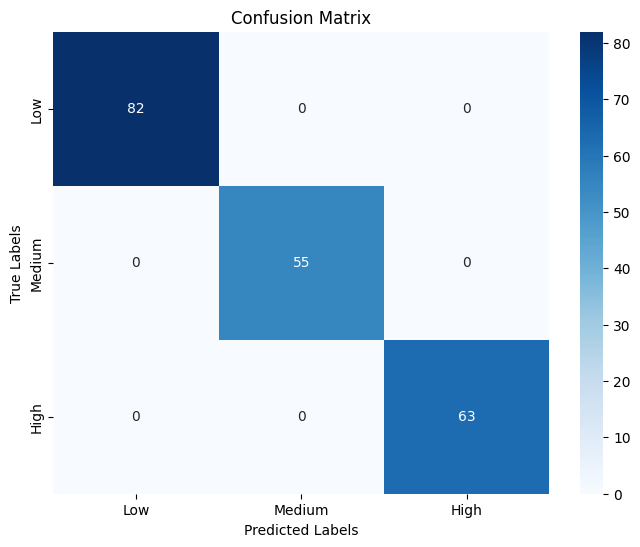

In [19]:
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## 5.2. Random Forest Model

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print(f"Accuracy (Random Forest): {accuracy_score(y_test, y_pred_rf)}")
print(classification_report(y_test, y_pred_rf))

model_accuracies.append(('RandomForestClassifier', accuracy_score(y_test, y_pred_rf)))

Accuracy (Random Forest): 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        63

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



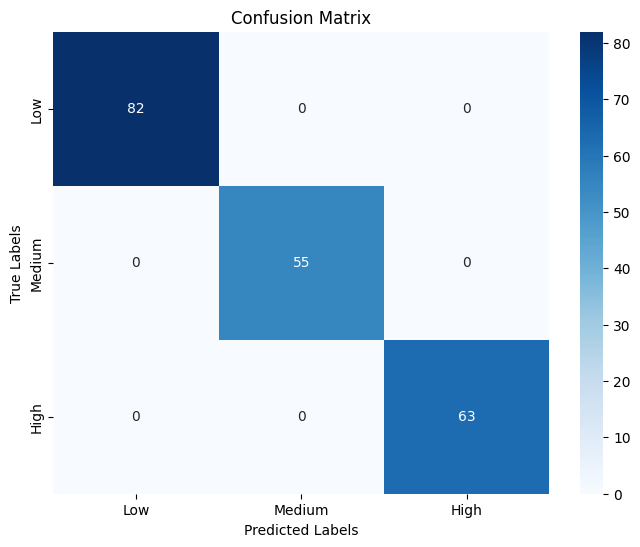

In [21]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## 5.3. Support vector machine Model

In [22]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=42)

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print(f"Accuracy (SVM): {accuracy_score(y_test, y_pred_svm)}")
print(classification_report(y_test, y_pred_svm))

model_accuracies.append(('SVC', accuracy_score(y_test, y_pred_svm)))

Accuracy (SVM): 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        63

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



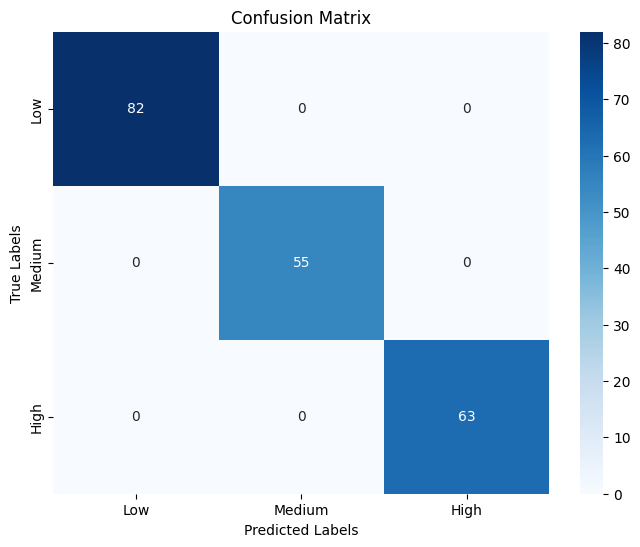

In [23]:
cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## 5.4. XGBoost Model

In [24]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print(f"Accuracy (XGBoost): {accuracy_score(y_test, y_pred_xgb)}")
print(classification_report(y_test, y_pred_xgb))

model_accuracies.append(('XGBClassifier', accuracy_score(y_test, y_pred_xgb)))

Accuracy (XGBoost): 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        63

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



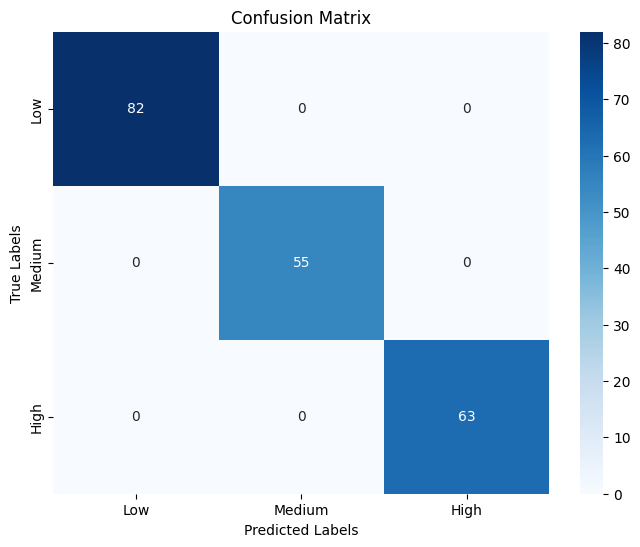

In [25]:
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## 5.5. Decision Tree Model

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("Model: Decision Tree")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):}")
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

model_accuracies.append(('DecisionTreeClassifier', accuracy_score(y_test, y_pred_dt)))

Model: Decision Tree
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        63

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



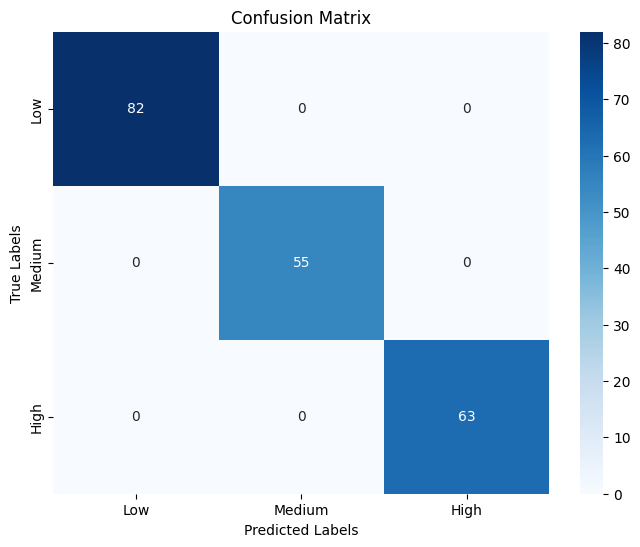

In [27]:
cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## 5.6. Gradient Boosting Model

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)

gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

print("Model: Gradient Boosting")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):}")
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))

model_accuracies.append(('GradientBoostingClassifier', accuracy_score(y_test, y_pred_gb)))

Model: Gradient Boosting
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        63

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



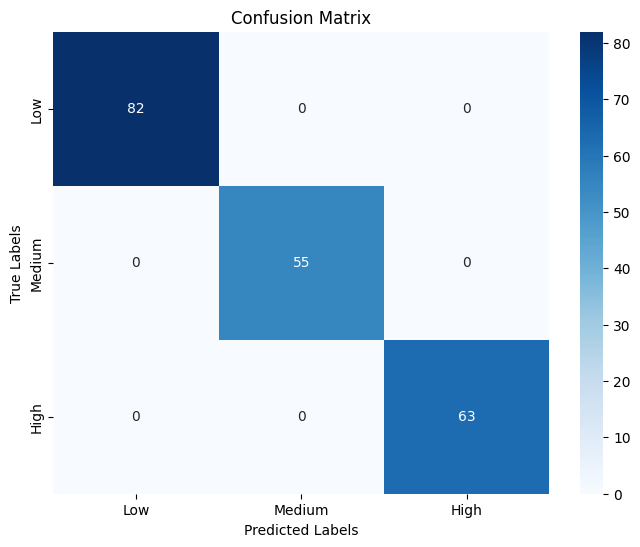

In [29]:
cm = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## 5.7. K-Nearest Model

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn_model = KNeighborsClassifier()

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

print("Model: K-Nearest Neighbors")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):}")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

model_accuracies.append(('K-Nearest Neighbors', accuracy_score(y_test, y_pred_knn)))

Model: K-Nearest Neighbors
Accuracy: 0.995
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      0.98      0.99        55
           2       0.98      1.00      0.99        63

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



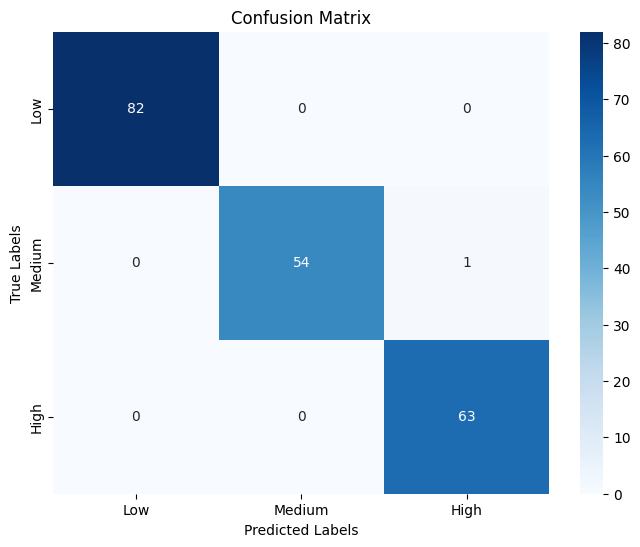

In [31]:
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## 5.8. Naive Bayes Model

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

print("Model: Naive Bayes")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):}")
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

model_accuracies.append(('Naive Bayes', accuracy_score(y_test, y_pred_nb)))

Model: Naive Bayes
Accuracy: 0.895
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91        82
           1       1.00      0.85      0.92        55
           2       0.85      0.84      0.85        63

    accuracy                           0.90       200
   macro avg       0.91      0.89      0.89       200
weighted avg       0.90      0.90      0.90       200



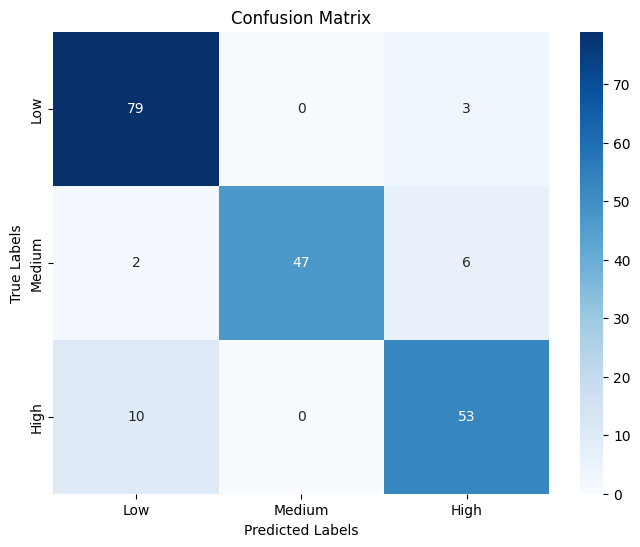

In [33]:
cm = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 6. Conclude

In [34]:
model_accuracies.sort(key=lambda x: x[1], reverse=True)

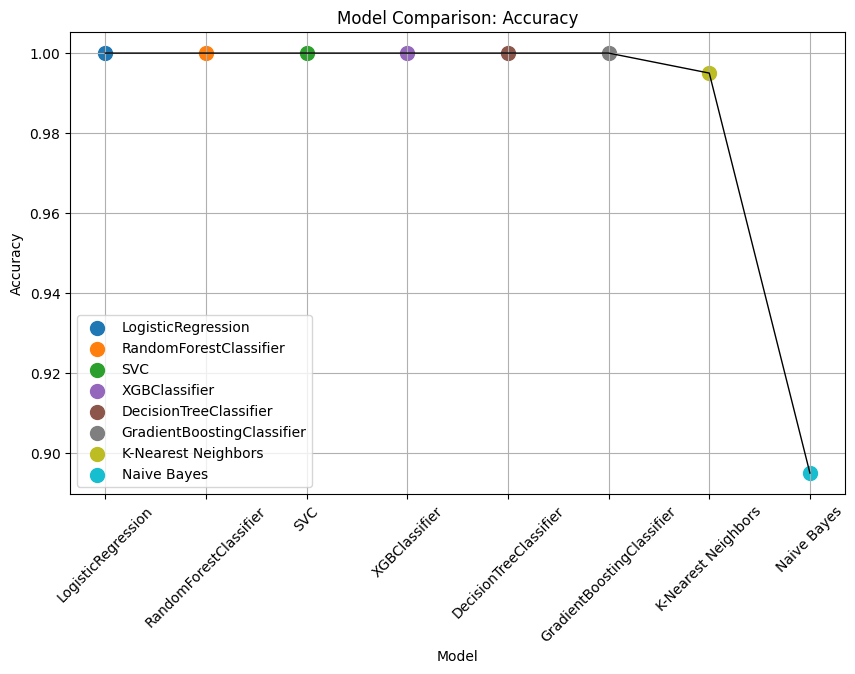

In [35]:
model_names = [x[0] for x in model_accuracies]
accuracies = [x[1] for x in model_accuracies]

# Set up color for each model
colors = plt.cm.tab10(np.linspace(0, 1, len(model_names)))

# Create plot
plt.figure(figsize=(10, 6))

# Scatter plot for each model with color
for i, (name, accuracy) in enumerate(zip(model_names, accuracies)):
    plt.scatter([name], [accuracy], color=colors[i], label=name, s=100)

# Add black line connecting points
plt.plot(model_names, accuracies, color='black', linestyle='-', linewidth=1)

# Configure plot
plt.title("Model Comparison: Accuracy")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)  # Rotate model names for readability
plt.grid(True)
plt.legend()  # Show legend to distinguish models
plt.show()

**Conclusion : In this study, multiple machine learning models were applied to predict cancer using a patient dataset, yielding varied accuracy results. The Naive Bayes model achieved a solid accuracy of 89.5%, showing potential for cancer prediction but with some limitations in precision. The K-Nearest Neighbors model performed exceptionally well, with an accuracy of 99.5%, indicating its strong ability to distinguish cancerous cases. Models such as Gradient Boosting, Decision Tree, XGBoost, Support Vector Machine, Random Forest, and Logistic Regression achieved perfect accuracy scores of 100%, demonstrating their robustness and high effectiveness for this task. These findings highlight the strength of ensemble and advanced models in cancer prediction, suggesting they could be reliable tools for clinical applications. However, further testing with larger and more diverse datasets is necessary to confirm consistency and applicability in real-world scenarios.**